In [1]:
# pip install -U nltk

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import defaultdict
from gensim.models import Phrases
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize





In [2]:
tweets_dataset = pd.read_csv('Dataset/Twitter/train.csv', encoding = "latin", header =None)

In [3]:
tweets_dataset = tweets_dataset.rename(columns = {
    0: "target",
    1: "ids",
    2: "date",
    3: "query",
    4: "user",
    5: "text"
})

tweets_dataset.head()

,target,ids,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
tweets_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   query   1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
tweets_dataset.isnull().sum()

target    0
ids       0
date      0
query     0
user      0
text      0
dtype: int64

In [6]:
tweets_dataset["target"].value_counts()

0    800000
4    800000
Name: target, dtype: int64

In [7]:
#READING A RANDOM POST FROM r/depression
print(tweets_dataset["text"][100])
len(tweets_dataset["text"][100])

 Body Of Missing Northern Calif. Girl Found: Police have found the remains of a missing Northern California girl .. http://tr.im/imji


133

#### Make a list of documents, we can create a list of stop words and remove them and tokenize each document. 

In [8]:
tweets_dataset['text']

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1600000, dtype: object

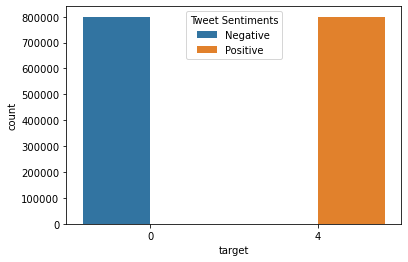

In [13]:
sns.countplot(x='target', data=tweets_dataset, hue='target')


plt.legend(title='Tweet Sentiments', loc='upper center', labels=['Negative', 'Positive'])
plt.show()


In [9]:
tweets_dataset = tweets_dataset.drop(['query'], axis=1)


### Text and User cleaning

In [23]:
#!pip install pandarallel

import preprocess_text as pt

#import our function to import data and clean it 
train_df,val_df,test_df = pt.suicidal_intent_data_load()
train_df.head()

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


,target,text
1362939,0,just drunk? now my feelings are hurt.
30301,1,oh no you didn't miss black kids or mastodon d...
369062,1,kfc wicked zinger tower meal.. had chinese tak...
1016590,0,: ahah! that was funny! especially that that d...
826994,0,great weekend sooooo exhaustedd


INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [19]:
train_df.head()

,target,text
695149,1,throwing up all night and not sleeping at all ...
1513124,0,using up the last of my uk credit on this sim....
84413,1,lucky you! i didn't see you last night did you...
1131660,0,"nothing, i'm doing nothing"
1223168,0,who said that cottage industry is dead?


In [21]:
test_df.head()

,target,text
0,1,is so sad for my apl friend.............
1,1,i missed the new moon trailer...
2,0,omg its already :30
3,1,.. omgaga. im sooo im gunna cry. i've been at ...
4,1,i think mi bf is cheating on me!!! t_t


In [22]:
val_df.head()

,target,text
909820,0,"yummy yum-cha for mother's day with mum, dad, ..."
1367076,0,"so glad i get to have a break next week, no mo..."
674398,1,sad in my hotel room waiting for a call that w...
863851,0,silly me! thanks
142310,1,and party for the fun people has been cancelled


In [15]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?@\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?@>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\@', '', text)
    text = re.sub('\_', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

In [16]:
tweets_dataset['text'] = tweets_dataset['text'].apply(clean_text)
tweets_dataset['user'] = tweets_dataset['user'].apply(clean_text)


In [17]:
tweets_dataset.head()

,target,ids,date,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,thespecialone,"switchfoot - awww, that's a bummer. you shou..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,kenichan i dived many times for the ball. mana...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ellectf,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,karoli,"nationwideclass no, it's not behaving at all. ..."


### Remove stop words

In [18]:
stop_words = stopwords.words('english')

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
tweets_dataset['text'] = tweets_dataset['text'].apply(remove_stopwords)
tweets_dataset.head()

,target,ids,date,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,thespecialone,"switchfoot - awww, that's bummer. shoulda go..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,upset can't update facebook texting it... migh...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,kenichan dived many times ball. managed save %...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ellectf,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,karoli,"nationwideclass no, behaving all. i'm mad. her..."


### Format date

In [19]:
# tweets_dataset['date'] = tweets_dataset['date'].dt.strftime('%m/%d/%Y')
tweets_dataset['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1600000 entries, 0 to 1599999
Series name: date
Non-Null Count    Dtype 
--------------    ----- 
1600000 non-null  object
dtypes: object(1)
memory usage: 12.2+ MB


In [20]:
tweets_dataset['date'] = pd.to_datetime(tweets_dataset['date'], format='%a %b %d %H:%M:%S PDT %Y')




In [21]:
tweets_dataset['formatted_date'] = tweets_dataset['date'].dt.strftime('%m-%d-%Y')
tweets_dataset['day'] = tweets_dataset['date'].dt.strftime('%a')

tweets_dataset = tweets_dataset.drop(['date'], axis=1)

In [22]:
tweets_dataset.head()

,target,ids,user,text,formatted_date,day
0,0,1467810369,thespecialone,"switchfoot - awww, that's bummer. shoulda go...",04-06-2009,Mon
1,0,1467810672,scotthamilton,upset can't update facebook texting it... migh...,04-06-2009,Mon
2,0,1467810917,mattycus,kenichan dived many times ball. managed save %...,04-06-2009,Mon
3,0,1467811184,ellectf,whole body feels itchy like fire,04-06-2009,Mon
4,0,1467811193,karoli,"nationwideclass no, behaving all. i'm mad. her...",04-06-2009,Mon


### Stemming

Stemming reduces the inflectional and derivational forms of words to a common base form, which can simplify text analysis and improve the accuracy of text-based applications.

For example, the words "running", "runs", and "ran" can be reduced to their stem "run", which can help to identify them as variants of the same word and thus improve the accuracy of analysis.

In [25]:
import nltk
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

tweets_dataset['text'] = tweets_dataset['text'].apply(stemm_text)
tweets_dataset.head()

,target,ids,user,text,formatted_date,day
0,0,1467810369,thespecialone,"switchfoot - awww, that bummer. shoulda got ...",04-06-2009,Mon
1,0,1467810672,scotthamilton,upset can't updat facebook text it... might cr...,04-06-2009,Mon
2,0,1467810917,mattycus,kenichan dive mani time ball. manag save % re...,04-06-2009,Mon
3,0,1467811184,ellectf,whole bodi feel itchi like fire,04-06-2009,Mon
4,0,1467811193,karoli,"nationwideclass no, behav all. i'm mad. here? ...",04-06-2009,Mon


In [ ]:
print("try")